# A basic tutorial Jupyter notebook for learning pytorch

*Goal*: To implement a neural network that can accept primary vote data and predict and 2CP including who the final two are, preferably outputting "nice" distributions.

In [1]:
import torch

c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## A basic neural network training on MNIST

Online tutorial from [Here](https://www.youtube.com/watch?v=BzcBsTou0C0&ab_channel=sentdex)

In [2]:
import torchvision
from torchvision import datasets, transforms

### Data handling

In [3]:
# Import MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

In [4]:
# The above data is in a nice form that this utility function can be used conveniently.
trainset = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True)

In [5]:
# Testing our that we can read out data
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

### Expressing one particular value in the dataset

In [6]:
# Loading a nice example
x,y = data[0][0], data[1][0]

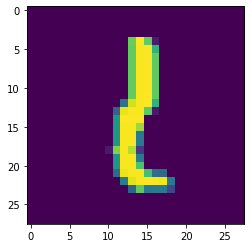

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x.view(28,28))

### Creating the basic neural network.
- Note that importing ```torch.nn``` and ```torch.nn.functional``` are used together

In [8]:
import torch.nn as nn 
import torch.nn.functional as F

In [9]:
# Create a neural net, which is represetned as a class.
class Net(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) ### !!! IMPORTANT 28*28 comes from the input data, which we known will be a flattened 28x28 pixel image will have be an array of length 28*28 and the 64 is the number of neuorons per layer.
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x,dim=1)
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [10]:
# The net is now initialised, but not trained. Let's test that we can pass data through.
X = torch.rand((28,28)) # Represents a random 28x28 pixel image.
X = X.view(-1,28*28) # For Neural network to run we need to flatten the data, the -1 tells pytorch to that the number of sample is irrelevant and the 28*28 specificies a tensor of length of 28*28, expected by net.


In [11]:
output = net(X) # Pass X through the net and it will spit out a vector of (logarathmic) probability for whether the is 0-9.
output

tensor([[-2.3806, -2.3039, -2.3644, -2.2033, -2.2414, -2.2290, -2.3666, -2.2514,
         -2.2840, -2.4268]], grad_fn=<LogSoftmaxBackward0>)

### Creating an optimizer for out neural net

In [12]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28)) # Here is our final parse of the data to give it the correct form befor the net handles it.
        loss = F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0062, grad_fn=<NllLossBackward0>)
tensor(0.0269, grad_fn=<NllLossBackward0>)
tensor(0.2817, grad_fn=<NllLossBackward0>)


In [13]:
# Let's test our data!
correct = 0
total = 0
with torch.no_grad():
    for data in testset:
        X,y = data
        output = net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total +=1 
print("Accuracy: ",round(correct/total,3))

Accuracy:  0.96


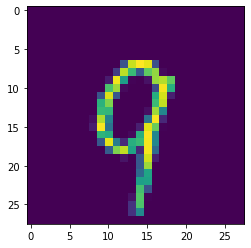

In [14]:
plt.imshow(X[5].view(28,28))
plt.show()

In [15]:
output = torch.argmax(net(X[5].view(-1,28*28)))
output

tensor(9)

## Convolutional Neural Network and Learning Datahandling

*Goal*: To develop a neural network that uses convolutions instead of Linear Layers and get familiar with data preprocessing.

- Side idea worth remembering: Convolutional Networks are for multi-dimensional input data. Usually for images, but could be used for 3D models or other data which can be thought of as having "features".
- Still following online tutorial

#### Data handling.
- Take folder of photos nad proccess. Learn to use flags and numpy to process and save data that can then be reloaded.

In [16]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog/"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount=0
    dogcount=0 

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label,f)
                    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE,self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                
                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    #print(str(e))
                    pass
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print("Cats: ",self.catcount)
        print("Dogs: ",self.dogcount)
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

In [17]:
training_data = np.load("training_data.npy",allow_pickle=True)


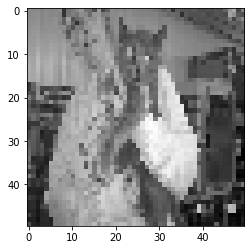

In [18]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap="gray")
plt.show()

#### Developing the actual CNN

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [20]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,32,5)
        self.conv2 = nn.Conv2d(32,64,5)
        self.conv3 = nn.Conv2d(64,128,5)

        x= torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)
        self.fc1 = nn.Linear(self._to_linear,512)
        self.fc2 = nn.Linear(512,2)
    def convs(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)),(2,2))

        if self._to_linear is None:
            print(x[0].shape)
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x
    def forward(self,x):
        x = self.convs(x)
        x = x.view(-1,self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x,dim=1)

net = Net()


torch.Size([128, 2, 2])


In [21]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0

y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)



C:\Users\patri\AppData\Local\Temp\ipykernel_19204\254632636.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:204.)
  X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)


In [22]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))

22452
2494


In [23]:
BATCH_SIZE = 100
EPOCHS = 3
def train(net):
    for epoch in range(EPOCHS):
        for i in tqdm(range(0,len(train_X),BATCH_SIZE)):
            batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
            batch_y = train_y[i:i+BATCH_SIZE]

            net.zero_grad()
            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()
        print(f"Epoch:{epoch}. Loss: {loss}")

In [24]:
train(net)

100%|██████████| 225/225 [00:25<00:00,  8.96it/s]


Epoch:0. Loss: 0.2665332555770874


100%|██████████| 225/225 [00:25<00:00,  8.93it/s]


Epoch:1. Loss: 0.21660710871219635


100%|██████████| 225/225 [00:25<00:00,  8.73it/s]

Epoch:2. Loss: 0.20716306567192078


In [25]:
def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i])

            net_out = net(test_X[i].view(-1,1,50,50))[0]
            predicted_class = torch.argmax(net_out)
            if predicted_class == real_class:
                correct +=1 
            total +=1
    print("Accuracy:",round(correct/total,3))


##### Brief Aside On GPU Assisted pytorch

In [26]:
torch.cuda.is_available()

True

In [27]:
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

In [28]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

In [29]:
net= Net().to(device)

torch.Size([128, 2, 2])


In [30]:
def train(net):
    for epoch in range(EPOCHS):
        for i in tqdm(range(0,len(train_X),BATCH_SIZE)):
            batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
            batch_y = train_y[i:i+BATCH_SIZE]

            batch_X, batch_y = batch_X.to(device),batch_y.to(device)
            net.zero_grad()
            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()
        print(f"Epoch:{epoch}. Loss: {loss}")
train(net)

100%|██████████| 225/225 [00:06<00:00, 36.94it/s]


Epoch:0. Loss: 0.25140810012817383


100%|██████████| 225/225 [00:02<00:00, 78.38it/s]


Epoch:1. Loss: 0.25140810012817383


100%|██████████| 225/225 [00:02<00:00, 78.68it/s]

Epoch:2. Loss: 0.25140810012817383


In [31]:
def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i]).to(device)

            net_out = net(test_X[i].view(-1,1,50,50).to(device))[0]
            predicted_class = torch.argmax(net_out)
            if predicted_class == real_class:
                correct +=1 
            total +=1
    print("Accuracy:",round(correct/total,3))
test(net)

100%|██████████| 2494/2494 [00:01<00:00, 1374.64it/s]

Accuracy: 0.501
